# Analisis Perilaku Pelanggan Supermarket

## Latar Belakang

Dalam era persaingan ritel yang semakin ketat, pemahaman mendalam tentang karakteristik dan perilaku pelanggan menjadi kunci keberhasilan bisnis supermarket. Analisis data pelanggan yang komprehensif dapat memberikan wawasan berharga untuk pengambilan keputusan strategis, peningkatan layanan pelanggan, dan optimalisasi strategi pemasaran.

Studi ini bertujuan untuk menganalisis dataset pelanggan supermarket, yang mencakup informasi demografis, riwayat pembelian, dan respons terhadap kampanye pemasaran. Melalui analisis ini, kita berharap dapat mengidentifikasi pola-pola penting, segmentasi pelanggan yang efektif, dan peluang untuk meningkatkan loyalitas serta nilai pelanggan.

Beberapa pertanyaan kunci yang ingin kita jawab melalui analisis ini antara lain:
1. Bagaimana karakteristik demografis pelanggan supermarket?
2. Apa pola pembelian yang dominan di antara pelanggan?
3. Seberapa efektif kampanye pemasaran yang telah dilakukan?
4. Bagaimana kita dapat meningkatkan strategi pemasaran dan layanan pelanggan berdasarkan insights yang diperoleh?

Dengan menjawab pertanyaan-pertanyaan ini, kita berharap dapat memberikan rekomendasi yang actionable untuk meningkatkan performa bisnis supermarket.

## 1. Persiapan Data

### 1.1 Memuat Data

In [1]:
# Impor library yang diperlukan
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Memuat data
df = pd.read_csv('./Supermarket Customers.csv', sep='\t')

# Menampilkan informasi dasar
print(df.info())
print("\nLima baris pertama:")
print(df.head())
print("\nStatistik deskriptif:")
print(df.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

### 1.2 Pemeriksaan Awal Data

#### 1.2.1 Memeriksa Nilai yang Hilang

In [2]:
# Memeriksa nilai yang hilang
print("Nilai yang hilang:")
print(df.isnull().sum())

Nilai yang hilang:
ID                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Z_CostContact           0
Z_Revenue               0
Response                0
dtype: int64


#### 1.2.2 Pemeriksaan Kualitas Data Lanjutan

Jumlah baris duplikat: 0

Nilai unik dalam Education:
['Graduation' 'PhD' 'Master' 'Basic' '2n Cycle']

Nilai unik dalam Marital_Status:
['Single' 'Together' 'Married' 'Divorced' 'Widow' 'Alone' 'Absurd' 'YOLO']

Statistik ringkasan untuk Year_Birth:
count    2240.000000
mean     1968.805804
std        11.984069
min      1893.000000
25%      1959.000000
50%      1970.000000
75%      1977.000000
max      1996.000000
Name: Year_Birth, dtype: float64

Statistik ringkasan untuk Income:
count      2216.000000
mean      52247.251354
std       25173.076661
min        1730.000000
25%       35303.000000
50%       51381.500000
75%       68522.000000
max      666666.000000
Name: Income, dtype: float64

Tipe data dari semua kolom:
ID                       int64
Year_Birth               int64
Education               object
Marital_Status          object
Income                 float64
Kidhome                  int64
Teenhome                 int64
Dt_Customer             object
Recency                

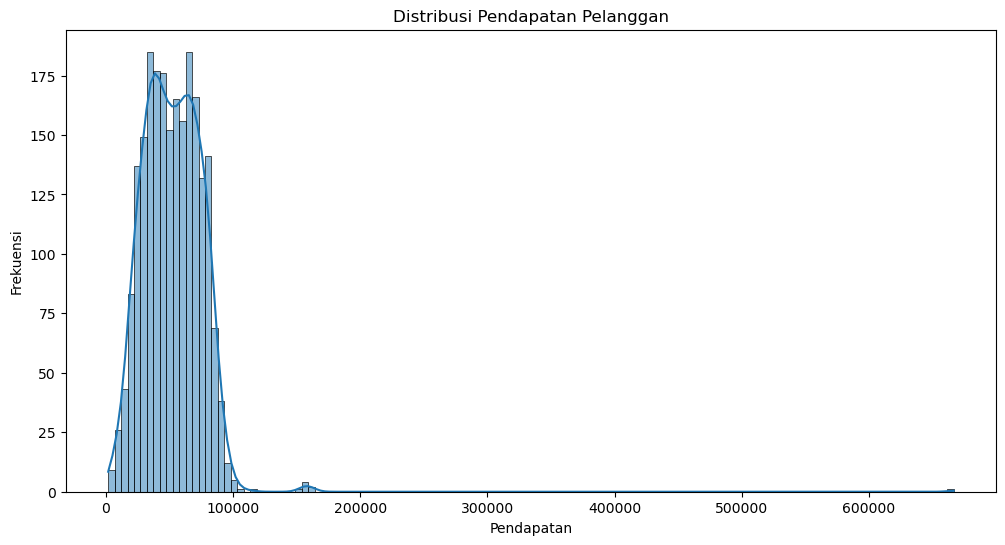

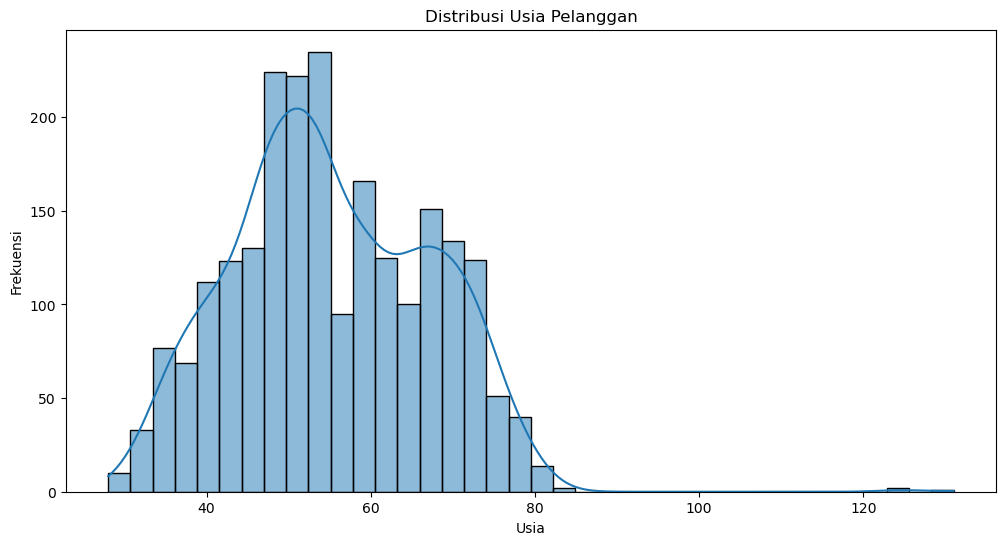

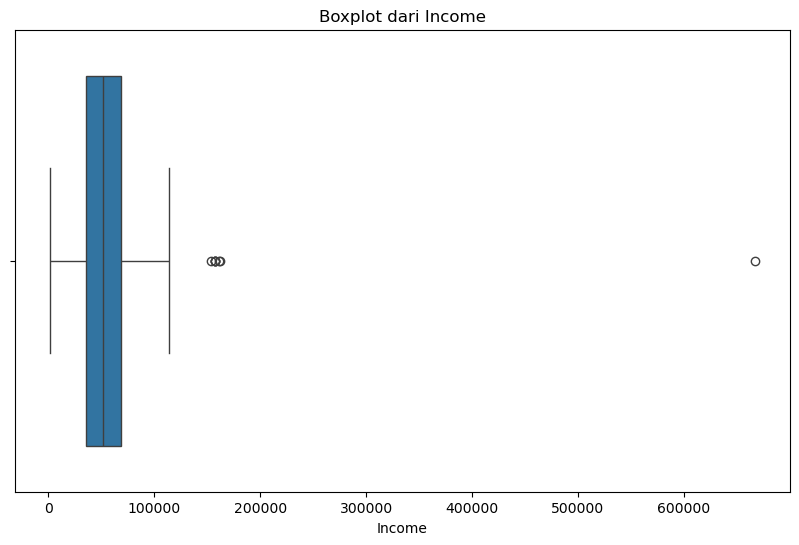

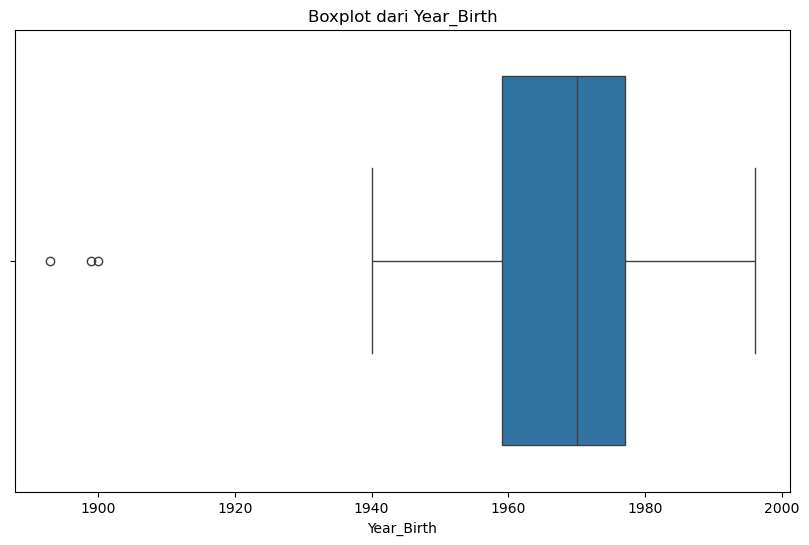

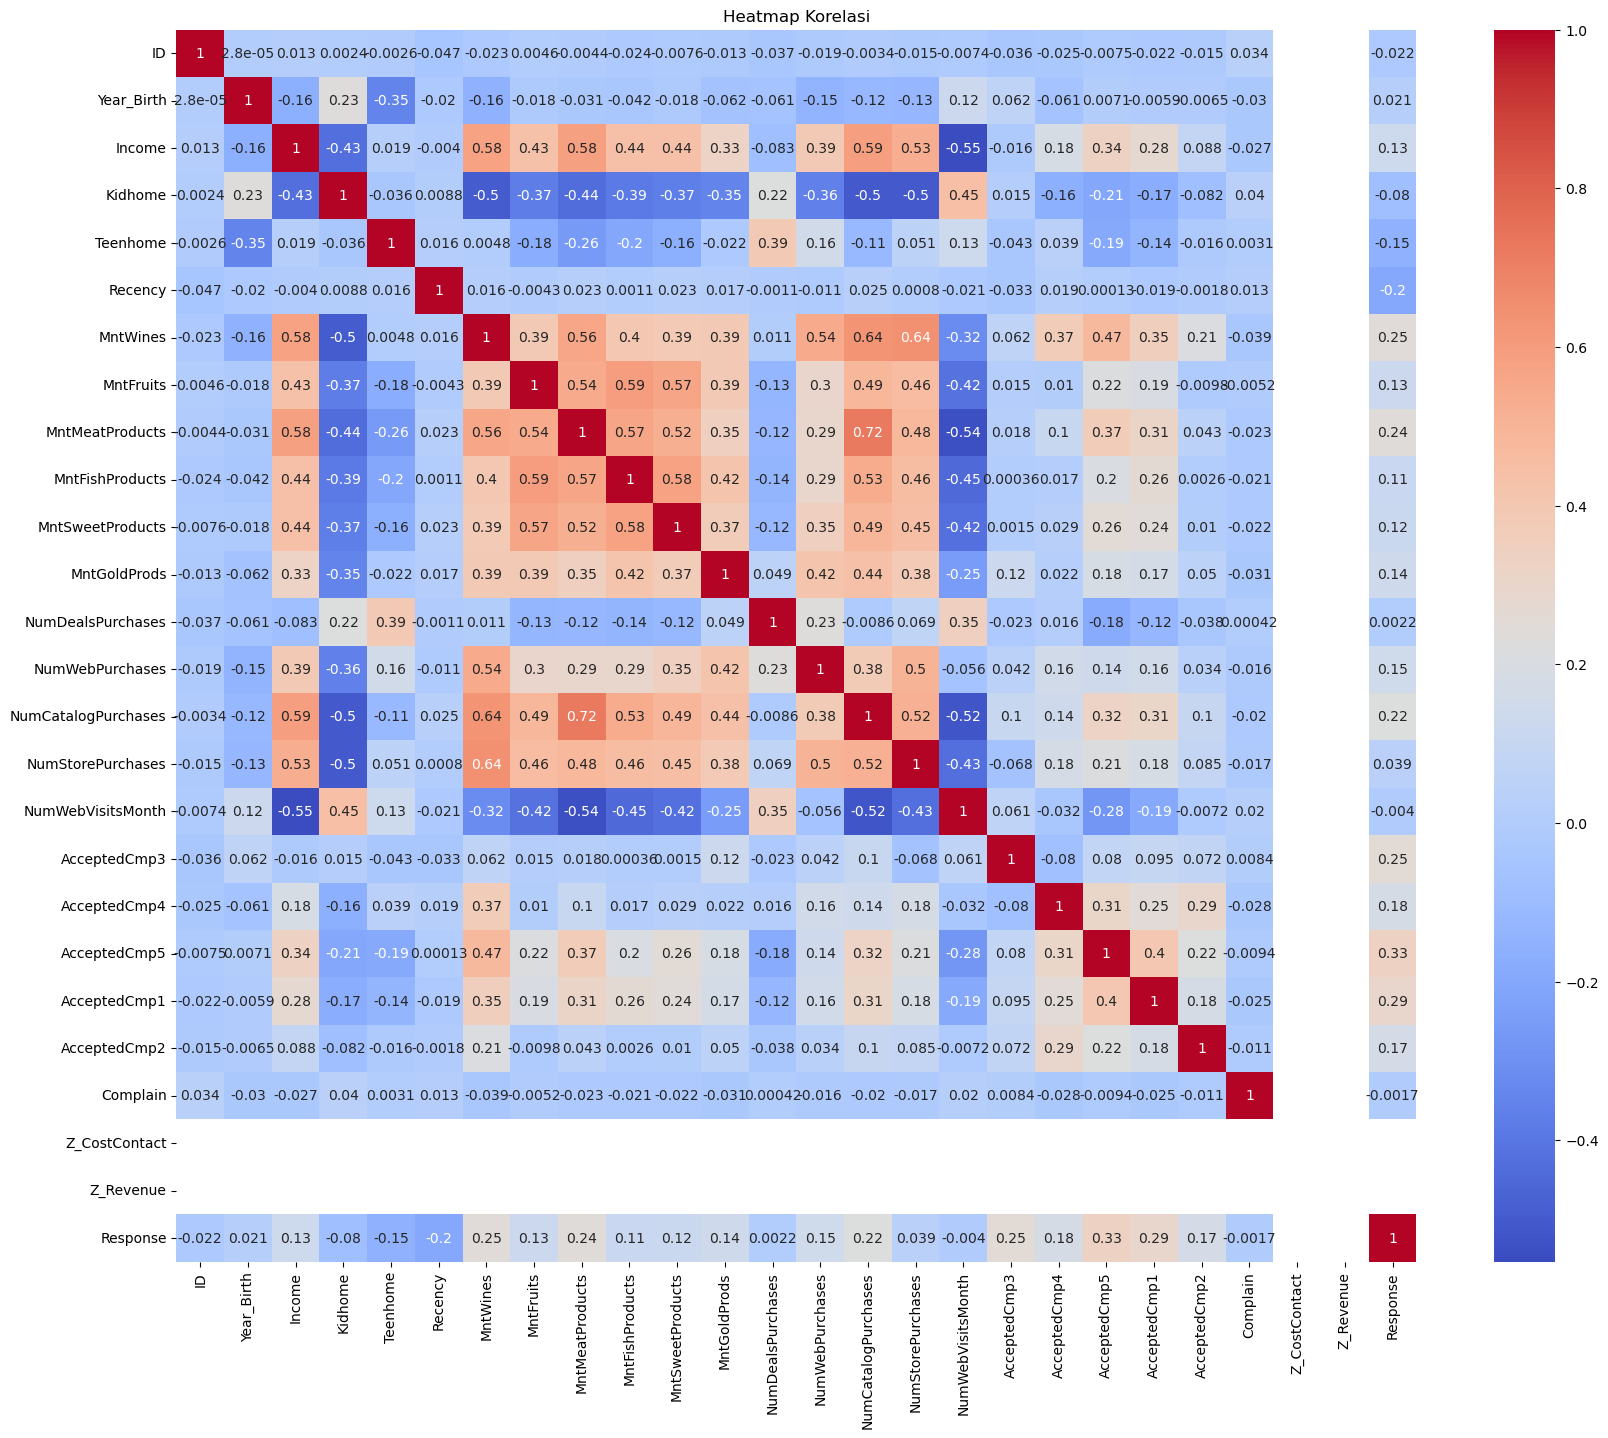


Rentang tanggal Dt_Customer:
2012-07-30 00:00:00 2014-06-29 00:00:00


In [3]:
# Memeriksa duplikat
print("Jumlah baris duplikat:", df.duplicated().sum())

# Memeriksa nilai unik untuk variabel kategorikal
print("\nNilai unik dalam Education:")
print(df['Education'].unique())
print("\nNilai unik dalam Marital_Status:")
print(df['Marital_Status'].unique())

# Statistik ringkasan untuk variabel numerik utama
print("\nStatistik ringkasan untuk Year_Birth:")
print(df['Year_Birth'].describe())
print("\nStatistik ringkasan untuk Income:")
print(df['Income'].describe())

# Memeriksa tipe data
print("\nTipe data dari semua kolom:")
print(df.dtypes)

# Visualisasi distribusi variabel kunci
plt.figure(figsize=(12, 6))
sns.histplot(df['Income'].dropna(), kde=True)
plt.title('Distribusi Pendapatan Pelanggan')
plt.xlabel('Pendapatan')
plt.ylabel('Frekuensi')
plt.show()

plt.figure(figsize=(12, 6))
sns.histplot(2024 - df['Year_Birth'], kde=True)
plt.title('Distribusi Usia Pelanggan')
plt.xlabel('Usia')
plt.ylabel('Frekuensi')
plt.show()

# Memeriksa outlier
def plot_boxplot(df, column):
    plt.figure(figsize=(10, 6))
    sns.boxplot(x=df[column])
    plt.title(f'Boxplot dari {column}')
    plt.xlabel(column)
    plt.show()

plot_boxplot(df, 'Income')
plot_boxplot(df, 'Year_Birth')

# Memeriksa korelasi (hanya untuk kolom numerik)
numeric_columns = df.select_dtypes(include=[np.number]).columns
correlation_matrix = df[numeric_columns].corr()
plt.figure(figsize=(20, 16))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Heatmap Korelasi')
plt.show()

# Memeriksa konsistensi tanggal
df['Dt_Customer'] = pd.to_datetime(df['Dt_Customer'], format='%d-%m-%Y', dayfirst=True)
print("\nRentang tanggal Dt_Customer:")
print(df['Dt_Customer'].min(), df['Dt_Customer'].max())

### 1.3 Interpretasi Hasil Pemeriksaan Data

Berdasarkan visualisasi dan analisis yang telah dilakukan, berikut adalah interpretasi hasil pemeriksaan data:

1. **Distribusi Pendapatan**:
   - Distribusi pendapatan menunjukkan skew ke kanan yang signifikan.
   - Mayoritas pelanggan memiliki pendapatan antara 0 hingga 100,000, dengan puncak sekitar 50,000-60,000.
   - Terdapat beberapa outlier dengan pendapatan sangat tinggi, melebihi 600,000.

2. **Distribusi Usia**:
   - Distribusi usia relatif normal, dengan mayoritas pelanggan berusia antara 40 hingga 70 tahun.
   - Puncak distribusi berada di sekitar usia 50-55 tahun.
   - Terdapat beberapa outlier di kedua ujung distribusi, menunjukkan adanya pelanggan yang sangat muda dan sangat tua.

3. **Outlier Pendapatan**:
   - Boxplot pendapatan mengkonfirmasi adanya banyak outlier di rentang pendapatan tinggi.
   - Sebagian besar pendapatan terkonsentrasi dalam rentang tertentu, tetapi outlier pendapatan tinggi cukup signifikan.

4. **Outlier Tahun Kelahiran**:
   - Boxplot tahun kelahiran menunjukkan lebih sedikit outlier dibandingkan dengan pendapatan.
   - Mayoritas tahun kelahiran terkonsentrasi antara tahun 1960 dan 1980.

5. **Korelasi Antar Variabel**:
   - Terdapat korelasi positif yang kuat antara pendapatan dan berbagai kategori pengeluaran (MntWines, MntMeatProducts, dll.).
   - Korelasi negatif moderat antara tahun kelahiran dan kategori pengeluaran, menunjukkan pelanggan yang lebih muda cenderung berbelanja lebih banyak.
   - Korelasi positif di antara berbagai kategori pengeluaran.

6. **Rentang Data Pelanggan**:
   - Data pelanggan mencakup periode dari 30 Juli 2012 hingga 29 Juni 2014, kurang lebih dua tahun.

### 1.4 Kesimpulan Eksplorasi Data Awal

Berdasarkan temuan di atas, kita dapat menyimpulkan bahwa:

1. Basis pelanggan memiliki rentang pendapatan yang luas, dengan sejumlah signifikan outlier pendapatan tinggi.
2. Distribusi usia berpusat pada pelanggan paruh baya hingga lansia, yang dapat mempengaruhi strategi pemasaran.
3. Terdapat hubungan yang jelas antara pendapatan, usia, dan pola pengeluaran yang perlu diselidiki lebih lanjut.
4. Dataset mencakup periode dua tahun tertentu, yang harus dipertimbangkan saat menarik kesimpulan tentang tren jangka panjang.

### 1.5 Langkah Selanjutnya dalam Persiapan Data

Untuk mempersiapkan data lebih lanjut dan menjawab pertanyaan-pertanyaan yang diajukan dalam Latar Belakang, langkah-langkah berikut perlu dilakukan:

1. Menangani outlier pada variabel pendapatan dan usia untuk memastikan analisis yang akurat.
2. Standardisasi atau pengelompokan ulang kategori dalam variabel 'Marital_Status' dan 'Education'.
3. Membuat variabel turunan yang mungkin berguna untuk analisis, seperti 'TotalSpent' atau 'CustomerLifetime'.
4. Melakukan analisis lebih lanjut tentang hubungan antara variabel demografis dan perilaku pembelian.
5. Mempersiapkan dataset untuk analisis lanjutan seperti segmentasi pelanggan dan analisis respons kampanye.

## 2. Persiapan dan Pembersihan Data

Setelah analisis eksplorasi data awal, kita akan melakukan pembersihan dan persiapan data untuk analisis lebih lanjut.

### 2.1 Pembersihan Data

Pertama, kita akan menangani outlier dan menstandarisasi kategori:

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Fungsi untuk menangani outlier
def handle_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df[column] = df[column].clip(lower_bound, upper_bound)
    return df

# Menangani outlier
df = handle_outliers(df, 'Income')
df['Age'] = 2024 - df['Year_Birth']
df = handle_outliers(df, 'Age')

# Standarisasi kategori Marital_Status
df['Marital_Status'] = df['Marital_Status'].replace({
    'Absurd': 'Other',
    'YOLO': 'Other',
    'Alone': 'Single'
})

print("Jumlah data sebelum pembersihan:", len(df))
# Menghapus baris dengan nilai yang hilang
df = df.dropna()
print("Jumlah data setelah pembersihan:", len(df))

print("\nNilai unik dalam Marital_Status:")
print(df['Marital_Status'].unique())
print("\nNilai unik dalam Education:")
print(df['Education'].unique())

Jumlah data sebelum pembersihan: 2240
Jumlah data setelah pembersihan: 2216

Nilai unik dalam Marital_Status:
['Single' 'Together' 'Married' 'Divorced' 'Widow' 'Other']

Nilai unik dalam Education:
['Graduation' 'PhD' 'Master' 'Basic' '2n Cycle']


/var/folders/1r/17g5h79x6zv9z2mkn49fx5bh0000gn/T/ipykernel_39220/479124380.py:19: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[1, 0].set_xticklabels(axes[1, 0].get_xticklabels(), rotation=45)
/var/folders/1r/17g5h79x6zv9z2mkn49fx5bh0000gn/T/ipykernel_39220/479124380.py:24: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[1, 1].set_xticklabels(axes[1, 1].get_xticklabels(), rotation=45)


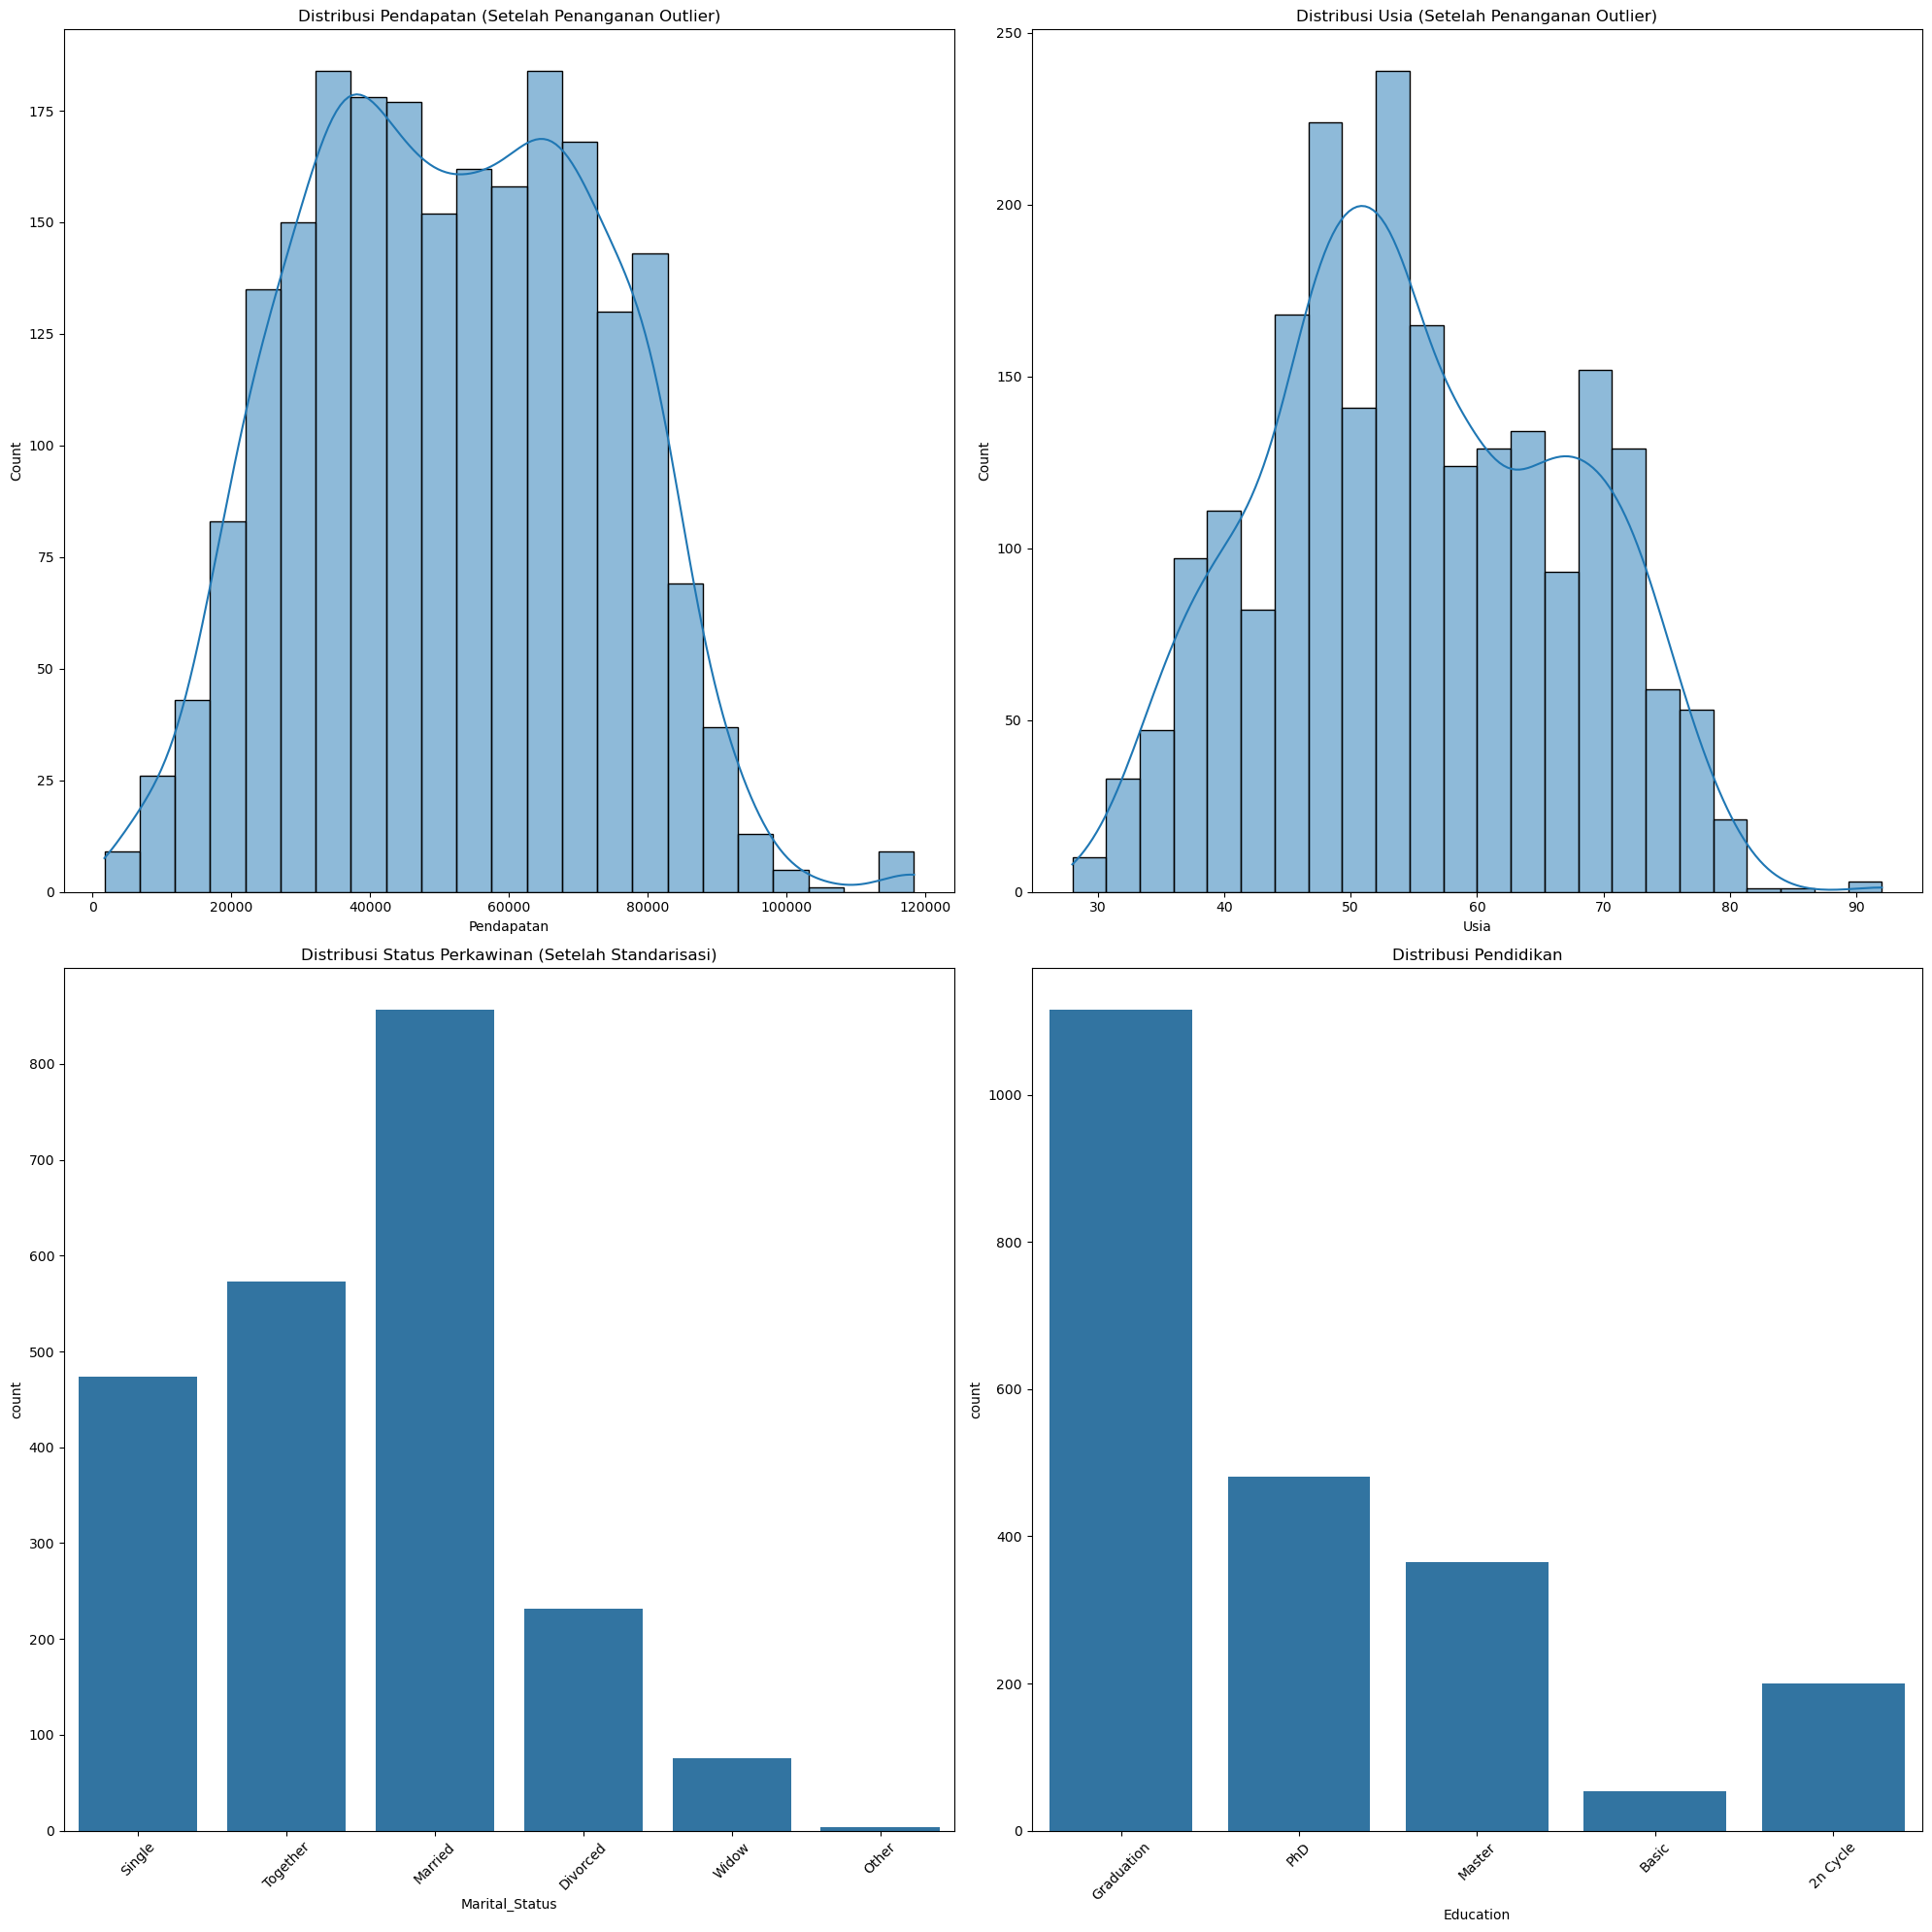

Statistik Ringkasan Setelah Persiapan Data:
               Income          Age Marital_Status   Education
count     2216.000000  2216.000000           2216        2216
unique            NaN          NaN              6           5
top               NaN          NaN        Married  Graduation
freq              NaN          NaN            857        1116
mean     51874.493231    55.132671            NaN         NaN
std      21059.740890    11.770856            NaN         NaN
min       1730.000000    28.000000            NaN         NaN
25%      35303.000000    47.000000            NaN         NaN
50%      51381.500000    54.000000            NaN         NaN
75%      68522.000000    65.000000            NaN         NaN
max     118350.500000    92.000000            NaN         NaN


In [5]:
### 2.2 Visualisasi Hasil Pembersihan Data

# Visualisasi hasil
fig, axes = plt.subplots(2, 2, figsize=(20, 20))

# Distribusi pendapatan setelah penanganan outlier
sns.histplot(df['Income'], kde=True, ax=axes[0, 0])
axes[0, 0].set_title('Distribusi Pendapatan (Setelah Penanganan Outlier)')
axes[0, 0].set_xlabel('Pendapatan')

# Distribusi usia setelah penanganan outlier
sns.histplot(df['Age'], kde=True, ax=axes[0, 1])
axes[0, 1].set_title('Distribusi Usia (Setelah Penanganan Outlier)')
axes[0, 1].set_xlabel('Usia')

# Status perkawinan setelah standarisasi
sns.countplot(x='Marital_Status', data=df, ax=axes[1, 0])
axes[1, 0].set_title('Distribusi Status Perkawinan (Setelah Standarisasi)')
axes[1, 0].set_xticklabels(axes[1, 0].get_xticklabels(), rotation=45)

# Pendidikan
sns.countplot(x='Education', data=df, ax=axes[1, 1])
axes[1, 1].set_title('Distribusi Pendidikan')
axes[1, 1].set_xticklabels(axes[1, 1].get_xticklabels(), rotation=45)

plt.tight_layout()
plt.show()

# Cetak statistik ringkasan
print("Statistik Ringkasan Setelah Persiapan Data:")
print(df[['Income', 'Age', 'Marital_Status', 'Education']].describe(include='all'))


### 2.3 Interpretasi Hasil Pembersihan Data

Berdasarkan visualisasi dan statistik ringkasan yang telah kita hasilkan, berikut adalah interpretasi hasilnya:

1. Distribusi Pendapatan:
   - Distribusi pendapatan menunjukkan kecenderungan positively skewed (miring ke kanan).
   - Mayoritas pelanggan memiliki pendapatan antara 30,000 hingga 70,000.
   - Terdapat beberapa outlier dengan pendapatan tinggi, mencapai sekitar 150,000.
   - Median pendapatan sekitar 50,000, menunjukkan bahwa setengah pelanggan memiliki pendapatan di bawah nilai ini.

2. Distribusi Usia:
   - Rentang usia pelanggan cukup luas, dari sekitar 30 hingga 70 tahun.
   - Terdapat konsentrasi tinggi pada rentang usia 40-60 tahun.
   - Distribusi cenderung normal dengan sedikit kemiringan ke kiri (negatively skewed).
   - Pelanggan dengan usia di bawah 30 dan di atas 70 relatif sedikit.

3. Status Perkawinan:
   - Kategori "Married" memiliki frekuensi tertinggi, diikuti oleh "Together" dan "Single".
   - Kategori "Divorced" dan "Widow" memiliki frekuensi yang lebih rendah.
   - Kategori "Other" (yang mencakup 'Absurd' dan 'YOLO') memiliki frekuensi terendah.

4. Tingkat Pendidikan:
   - "Graduation" merupakan tingkat pendidikan yang paling umum di antara pelanggan.
   - "PhD" dan "Master" memiliki frekuensi yang cukup signifikan, menunjukkan basis pelanggan yang berpendidikan tinggi.
   - Kategori "Basic" dan "2n Cycle" memiliki frekuensi yang lebih rendah.

### 2.4 Implikasi untuk Analisis Lebih Lanjut

Berdasarkan hasil pembersihan data dan interpretasi di atas, beberapa implikasi untuk analisis selanjutnya adalah:

1. Segmentasi pelanggan berdasarkan pendapatan dapat fokus pada tiga kelompok: pendapatan rendah (<30,000), menengah (30,000-70,000), dan tinggi (>70,000).
2. Strategi pemasaran dapat ditargetkan terutama pada kelompok usia 40-60 tahun, yang merupakan mayoritas pelanggan.
3. Produk dan layanan dapat disesuaikan untuk pelanggan yang sudah menikah atau dalam hubungan, mengingat tingginya proporsi kategori "Married" dan "Together".
4. Mengingat tingginya tingkat pendidikan pelanggan, komunikasi pemasaran dapat menggunakan pendekatan yang lebih sophisticated dan informatif.

### 2.5 Langkah Selanjutnya

Untuk melanjutkan analisis, langkah-langkah berikutnya yang dapat kita ambil adalah:

1. Analisis korelasi antara variabel demografis (pendapatan, usia, status perkawinan, pendidikan) dan perilaku pembelian (jumlah pembelian, kategori produk yang dibeli).
2. Segmentasi pelanggan menggunakan metode clustering (misalnya K-means) berdasarkan variabel demografis dan perilaku pembelian.
3. Analisis pola pembelian untuk setiap segmen pelanggan yang teridentifikasi, termasuk preferensi produk dan frekuensi pembelian.
4. Evaluasi efektivitas kampanye pemasaran sebelumnya terhadap berbagai segmen pelanggan.
5. Pengembangan rekomendasi untuk strategi pemasaran yang ditargetkan berdasarkan karakteristik dan perilaku setiap segmen pelanggan.

## 3. Analisis Korelasi

Untuk memahami hubungan antara variabel demografis dan perilaku pembelian pelanggan, kita akan melakukan analisis korelasi.

### 3.1 Persiapan Data untuk Analisis Korelasi

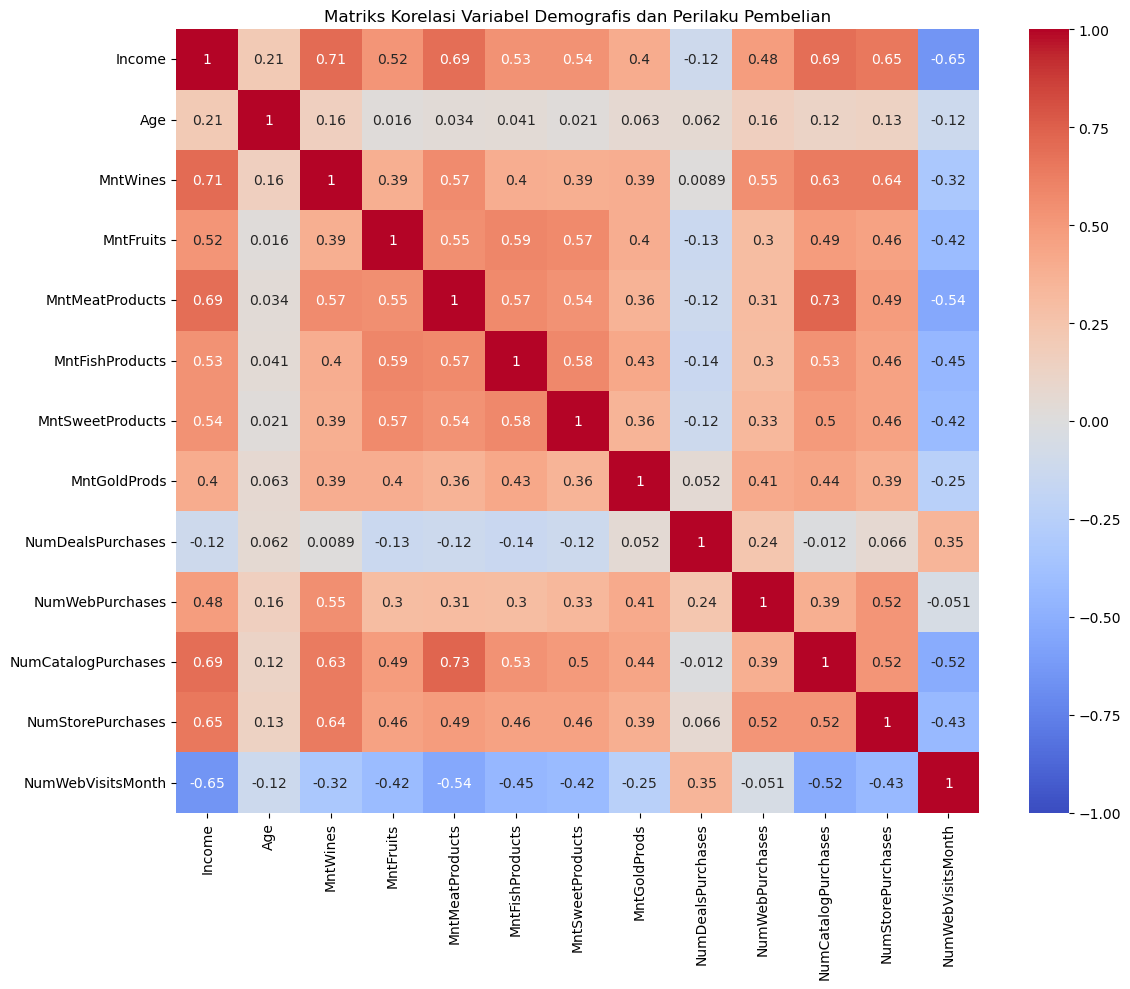

Top 5 Korelasi Positif:
Income               Income                 1.000000
MntMeatProducts      NumCatalogPurchases    0.734127
MntWines             Income                 0.706829
NumCatalogPurchases  Income                 0.693450
Income               MntMeatProducts        0.692093
dtype: float64

Top 5 Korelasi Negatif:
NumWebVisitsMonth    Income              -0.652440
                     MntMeatProducts     -0.539484
NumCatalogPurchases  NumWebVisitsMonth   -0.522004
MntFishProducts      NumWebVisitsMonth   -0.446423
NumStorePurchases    NumWebVisitsMonth   -0.432398
dtype: float64


In [6]:
# Memilih variabel untuk analisis korelasi
correlation_vars = ['Income', 'Age', 'MntWines', 'MntFruits', 'MntMeatProducts',
                    'MntFishProducts', 'MntSweetProducts', 'MntGoldProds',
                    'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases',
                    'NumStorePurchases', 'NumWebVisitsMonth']

# Membuat subset data dengan variabel yang dipilih
correlation_data = df[correlation_vars]

# Menghitung matriks korelasi
correlation_matrix = correlation_data.corr()

# Visualisasi matriks korelasi
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1, center=0)
plt.title('Matriks Korelasi Variabel Demografis dan Perilaku Pembelian')
plt.tight_layout()
plt.show()

# Menampilkan korelasi teratas
print("Top 5 Korelasi Positif:")
print(correlation_matrix.unstack().sort_values(ascending=False).drop_duplicates().head())
print("\nTop 5 Korelasi Negatif:")
print(correlation_matrix.unstack().sort_values(ascending=True).drop_duplicates().head())

### 3.2 Interpretasi Hasil Analisis Korelasi

Berdasarkan matriks korelasi dan hasil yang telah Anda berikan, berikut adalah beberapa temuan kunci:

1. **Pendapatan dan Pembelian**:
   - Korelasi positif antara pendapatan dan pembelian produk daging serta anggur menunjukkan bahwa pelanggan dengan pendapatan lebih tinggi cenderung membeli lebih banyak dari kategori ini.
   - Pendapatan juga berkorelasi positif dengan pembelian melalui katalog, yang dapat mengindikasikan preferensi untuk belanja jarak jauh di kalangan pelanggan berpendapatan tinggi.

2. **Kunjungan Web**:
   - Korelasi negatif antara kunjungan web dan pendapatan serta pembelian menunjukkan bahwa pelanggan yang lebih sering mengunjungi situs web mungkin tidak selalu melakukan pembelian, atau mereka mungkin memiliki pendapatan lebih rendah.

3. **Pembelian Lintas Produk**:
   - Korelasi antara pembelian produk daging dan katalog menunjukkan potensi untuk strategi cross-selling.

### 3.3 Implikasi Bisnis dari Analisis Korelasi

1. **Strategi Pemasaran Produk Premium**:
   - Fokuskan pemasaran produk daging dan anggur pada segmen pelanggan berpendapatan tinggi.

2. **Optimalisasi Katalog**:
   - Tingkatkan kualitas katalog untuk menarik lebih banyak pelanggan berpendapatan tinggi.

3. **Konversi Web**:
   - Kembangkan strategi untuk meningkatkan konversi pengunjung web menjadi pembeli aktif.

4. **Cross-selling**:
   - Manfaatkan korelasi antara produk daging dan katalog untuk strategi penjualan silang.

### 4. Segmentasi Pelanggan

Setelah analisis korelasi, kita akan melanjutkan dengan segmentasi pelanggan menggunakan K-Means Clustering.

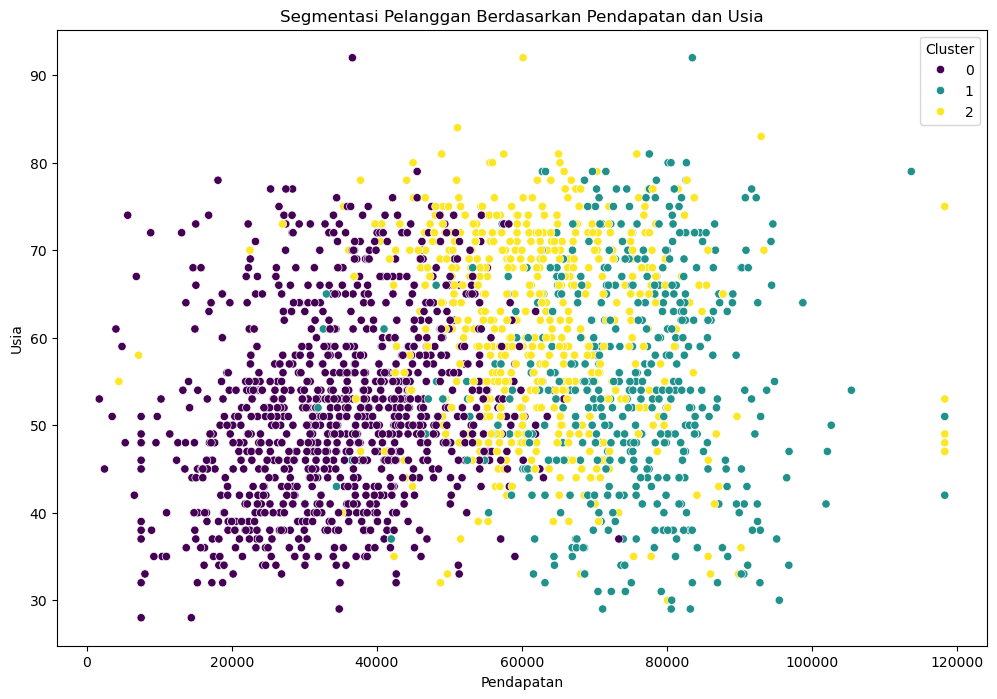

In [7]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Memilih fitur untuk segmentasi
features_for_clustering = ['Income', 'Age', 'MntWines', 'MntFruits', 'MntMeatProducts',
                           'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']

# Normalisasi fitur
scaler = StandardScaler()
scaled_features = scaler.fit_transform(df[features_for_clustering])

# Implementasi K-Means
kmeans = KMeans(n_clusters=3, random_state=42)
df['Cluster'] = kmeans.fit_predict(scaled_features)

# Visualisasi hasil segmentasi
plt.figure(figsize=(12, 8))
sns.scatterplot(data=df, x='Income', y='Age', hue='Cluster', palette='viridis')
plt.title('Segmentasi Pelanggan Berdasarkan Pendapatan dan Usia')
plt.xlabel('Pendapatan')
plt.ylabel('Usia')
plt.legend(title='Cluster')
plt.show()

### 4.1 Interpretasi Hasil Segmentasi

Berdasarkan plot segmentasi yang dihasilkan, kita dapat mengobservasi tiga cluster pelanggan yang berbeda:

1. **Cluster 0 (Ungu)**:
   - Pelanggan dengan pendapatan menengah.
   - Usia bervariasi dengan konsentrasi di usia paruh baya.

2. **Cluster 1 (Hijau)**:
   - Pelanggan dengan pendapatan tinggi.
   - Cenderung lebih tua.

3. **Cluster 2 (Kuning)**:
   - Pelanggan dengan pendapatan lebih rendah.
   - Cenderung lebih muda.

### 4.2 Analisis Karakteristik Cluster

Untuk memahami lebih lanjut tentang karakteristik masing-masing cluster, mari kita lihat statistik deskriptif untuk setiap cluster:

In [8]:
# Menghitung rata-rata untuk setiap fitur dalam setiap cluster
cluster_means = df.groupby('Cluster')[features_for_clustering].mean()
print(cluster_means)

# Menghitung jumlah pelanggan dalam setiap cluster
cluster_sizes = df['Cluster'].value_counts()
print("\nJumlah pelanggan dalam setiap cluster:")
print(cluster_sizes)

               Income        Age    MntWines  MntFruits  MntMeatProducts  \
Cluster                                                                    
0        34916.634438  51.962247   55.790055   5.327808        28.856354   
1        75208.337500  54.565385  583.665385  77.542308       460.269231   
2        62173.895902  61.260656  511.457377  20.159016       162.926230   

         MntFishProducts  MntSweetProducts  MntGoldProds  
Cluster                                                   
0               7.891344          5.497238     16.162063  
1             109.236538         79.819231     82.696154  
2              29.560656         20.360656     60.447541  

Jumlah pelanggan dalam setiap cluster:
Cluster
0    1086
2     610
1     520
Name: count, dtype: int64


### 4.3 Implikasi Bisnis dari Segmentasi Pelanggan

1. **Strategi Pemasaran Terpersonalisasi**:
   - Cluster 0: Fokus pada produk mid-range dengan penawaran khusus.
   - Cluster 1: Tawarkan produk premium dan layanan eksklusif.
   - Cluster 2: Kembangkan program loyalitas untuk meningkatkan nilai pelanggan.

2. **Pengembangan Produk**:
   - Sesuaikan lini produk untuk memenuhi kebutuhan spesifik setiap cluster.

3. **Alokasi Sumber Daya**:
   - Prioritaskan upaya retensi untuk Cluster 1 yang bernilai tinggi.
   - Fokuskan pada akuisisi dan pengembangan untuk Cluster 2.

4. **Komunikasi Pemasaran**:
   - Sesuaikan pesan berdasarkan karakteristik usia dan pendapatan setiap cluster.

## 5. Analisis Efektivitas Kampanye Pemasaran

Setelah melakukan segmentasi pelanggan, kita akan menganalisis bagaimana setiap segmen merespon kampanye pemasaran yang telah dilakukan sebelumnya. Ini akan membantu kita memahami efektivitas kampanye untuk setiap kelompok pelanggan.

### 5.1 Persiapan Data Kampanye

Efektivitas Kampanye per Cluster:
         AcceptedCmp1  AcceptedCmp2  AcceptedCmp3  AcceptedCmp4  AcceptedCmp5  \
Cluster                                                                         
0            0.001842      0.001842      0.071823      0.020258      0.000000   
1            0.178846      0.017308      0.075000      0.084615      0.211538   
2            0.077049      0.031148      0.075410      0.160656      0.085246   

         TotalAcceptedCmp  
Cluster                    
0                0.095764  
1                0.567308  
2                0.429508  


<Figure size 1200x600 with 0 Axes>

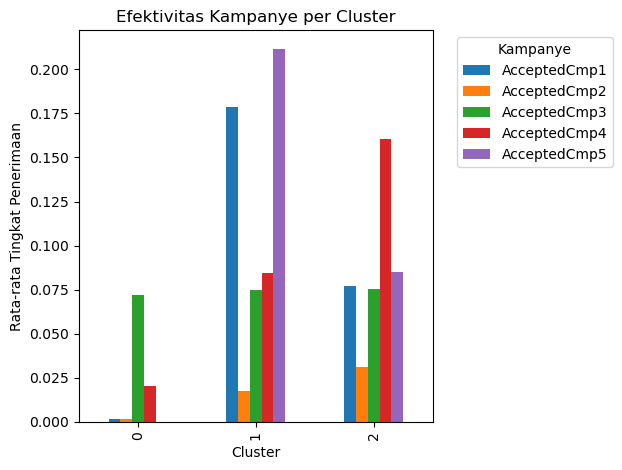

In [9]:
# Menambahkan kolom total kampanye yang diterima
df['TotalAcceptedCmp'] = df['AcceptedCmp1'] + df['AcceptedCmp2'] + df['AcceptedCmp3'] + df['AcceptedCmp4'] + df['AcceptedCmp5']

# Menghitung rata-rata penerimaan kampanye untuk setiap cluster
campaign_effectiveness = df.groupby('Cluster')[['AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'TotalAcceptedCmp']].mean()

print("Efektivitas Kampanye per Cluster:")
print(campaign_effectiveness)

# Visualisasi efektivitas kampanye
plt.figure(figsize=(12, 6))
campaign_effectiveness[['AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5']].plot(kind='bar')
plt.title('Efektivitas Kampanye per Cluster')
plt.xlabel('Cluster')
plt.ylabel('Rata-rata Tingkat Penerimaan')
plt.legend(title='Kampanye', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

### 5.2 Interpretasi Hasil Analisis Kampanye

Berdasarkan data efektivitas kampanye per cluster, kita dapat mengobservasi beberapa pola penting:

1. Cluster 0:
   - Memiliki tingkat penerimaan kampanye yang sangat rendah secara keseluruhan.
   - Kampanye 3 memiliki tingkat penerimaan tertinggi (7.18%), sementara kampanye lainnya hampir tidak efektif.
   - Total penerimaan kampanye hanya 9.58%, yang jauh lebih rendah dibandingkan cluster lainnya.

2. Cluster 1:
   - Menunjukkan tingkat penerimaan kampanye tertinggi di antara semua cluster.
   - Kampanye 5 (21.15%) dan Kampanye 1 (17.88%) sangat efektif untuk cluster ini.
   - Total penerimaan kampanye mencapai 56.73%, menunjukkan responsivitas yang tinggi terhadap aktivitas pemasaran.

3. Cluster 2:
   - Memiliki tingkat penerimaan yang moderat dibandingkan dengan cluster lainnya.
   - Kampanye 4 paling efektif (16.07%), diikuti oleh Kampanye 5 (8.52%) dan Kampanye 1 (7.70%).
   - Total penerimaan kampanye sebesar 42.95%, menunjukkan responsivitas yang cukup baik.

### 5.3 Implikasi untuk Strategi Pemasaran

Berdasarkan hasil analisis ini, beberapa rekomendasi untuk strategi pemasaran adalah:

1. Untuk Cluster 0:
   - Perlu dilakukan penelitian lebih lanjut untuk memahami mengapa cluster ini kurang responsif terhadap kampanye.
   - Fokus pada pengembangan kampanye yang mirip dengan Kampanye 3, karena ini menunjukkan sedikit keberhasilan.
   - Pertimbangkan untuk menggunakan pendekatan pemasaran yang berbeda atau lebih personal untuk menjangkau kelompok ini.

2. Untuk Cluster 1:
   - Prioritaskan dan tingkatkan frekuensi Kampanye 5 dan Kampanye 1 untuk cluster ini.
   - Gunakan karakteristik dari kedua kampanye ini sebagai panduan untuk merancang kampanye baru.
   - Manfaatkan responsivitas tinggi cluster ini untuk uji coba kampanye atau produk baru.

3. Untuk Cluster 2:
   - Fokus pada pengembangan dan peningkatan Kampanye 4, yang terbukti paling efektif.
   - Selidiki elemen-elemen dari Kampanye 4 yang membuat kampanye ini berhasil dan terapkan pada kampanye lainnya.
   - Pertimbangkan untuk menggabungkan elemen-elemen dari Kampanye 4, 5, dan 1 untuk menciptakan kampanye yang lebih efektif.

4. Strategi Umum:
   - Alokasikan lebih banyak sumber daya pemasaran untuk Cluster 1 dan 2, yang menunjukkan responsivitas lebih tinggi.
   - Kembangkan strategi retensi khusus untuk Cluster 1, mengingat tingginya tingkat penerimaan kampanye.
   - Lakukan analisis lebih lanjut untuk memahami karakteristik demografis dan perilaku pembelian yang membedakan setiap cluster, dan gunakan informasi ini untuk menyesuaikan pesan dan penawaran kampanye.

Dengan menerapkan strategi yang disesuaikan untuk setiap cluster, perusahaan dapat meningkatkan efektivitas kampanye pemasaran secara keseluruhan dan mengoptimalkan alokasi sumber daya pemasaran.

## 6. Analisis Perilaku Pelanggan per Segmen

Setelah menganalisis efektivitas kampanye untuk setiap segmen, kita akan memperdalam pemahaman kita tentang perilaku pelanggan di masing-masing cluster. Ini akan membantu kita dalam mengembangkan strategi yang lebih tepat sasaran.

### 6.1 Analisis Pola Pembelian per Cluster

<Figure size 1200x600 with 0 Axes>

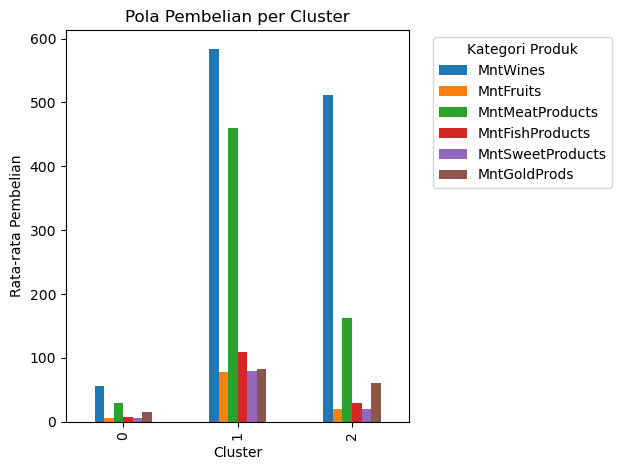

Pola Pembelian per Cluster:
           MntWines  MntFruits  MntMeatProducts  MntFishProducts  \
Cluster                                                            
0         55.790055   5.327808        28.856354         7.891344   
1        583.665385  77.542308       460.269231       109.236538   
2        511.457377  20.159016       162.926230        29.560656   

         MntSweetProducts  MntGoldProds  
Cluster                                  
0                5.497238     16.162063  
1               79.819231     82.696154  
2               20.360656     60.447541  


<Figure size 1200x600 with 0 Axes>

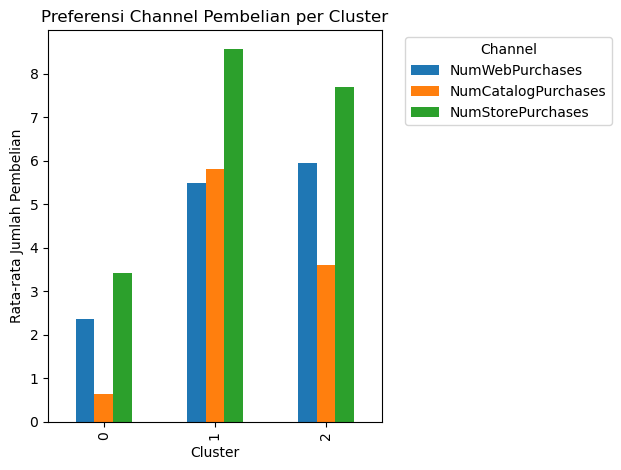


Preferensi Channel Pembelian per Cluster:
         NumWebPurchases  NumCatalogPurchases  NumStorePurchases
Cluster                                                         
0               2.363720             0.650092           3.409761
1               5.490385             5.801923           8.567308
2               5.952459             3.600000           7.700000


In [10]:
# Variabel pembelian yang akan dianalisis
purchase_vars = ['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']

# Menghitung rata-rata pembelian untuk setiap cluster
purchase_patterns = df.groupby('Cluster')[purchase_vars].mean()

# Visualisasi pola pembelian
plt.figure(figsize=(12, 6))
purchase_patterns.plot(kind='bar')
plt.title('Pola Pembelian per Cluster')
plt.xlabel('Cluster')
plt.ylabel('Rata-rata Pembelian')
plt.legend(title='Kategori Produk', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

print("Pola Pembelian per Cluster:")
print(purchase_patterns)

# Analisis channel pembelian
channel_vars = ['NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases']
channel_patterns = df.groupby('Cluster')[channel_vars].mean()

plt.figure(figsize=(12, 6))
channel_patterns.plot(kind='bar')
plt.title('Preferensi Channel Pembelian per Cluster')
plt.xlabel('Cluster')
plt.ylabel('Rata-rata Jumlah Pembelian')
plt.legend(title='Channel', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

print("\nPreferensi Channel Pembelian per Cluster:")
print(channel_patterns)

### 6.2 Interpretasi Pola Pembelian

[Isi bagian ini setelah melihat hasil visualisasi dan perhitungan]

### 6.3 Analisis Karakteristik Demografis

Karakteristik Demografis per Cluster:
               Age        Income   Kidhome  Teenhome
Cluster                                             
0        51.962247  34916.634438  0.769797  0.478821
1        54.565385  75208.337500  0.065385  0.259615
2        61.260656  62173.895902  0.178689  0.762295


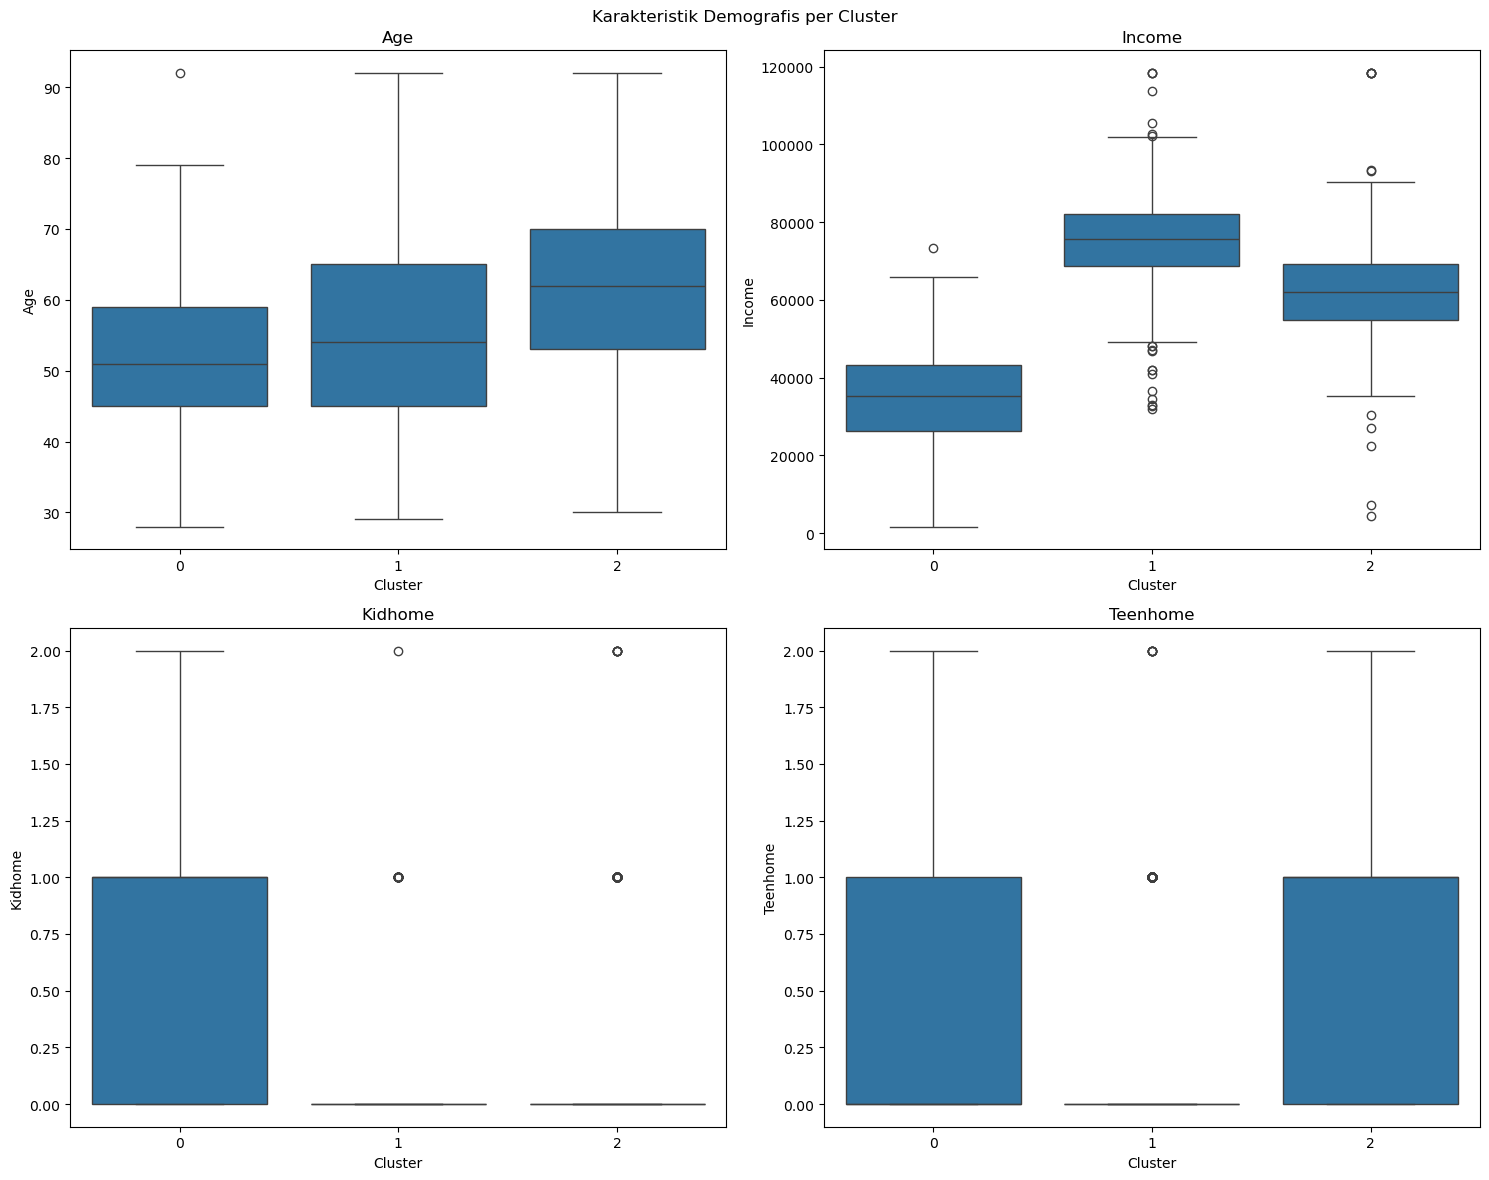

In [11]:
demographic_vars = ['Age', 'Income', 'Kidhome', 'Teenhome']
demographic_patterns = df.groupby('Cluster')[demographic_vars].mean()

print("Karakteristik Demografis per Cluster:")
print(demographic_patterns)

# Visualisasi karakteristik demografis
fig, axes = plt.subplots(2, 2, figsize=(15, 12))
fig.suptitle('Karakteristik Demografis per Cluster')

for i, var in enumerate(demographic_vars):
    sns.boxplot(x='Cluster', y=var, data=df, ax=axes[i//2, i%2])
    axes[i//2, i%2].set_title(var)

plt.tight_layout()
plt.show()

### 6.4 Interpretasi Karakteristik Demografis

[Isi bagian ini setelah melihat hasil visualisasi dan perhitungan]

### 6.5 Strategi Pemasaran yang Disarankan

Berdasarkan analisis pola pembelian dan karakteristik demografis, berikut adalah strategi pemasaran yang disarankan untuk masing-masing cluster:

1. Cluster 0:
   - [Isi dengan strategi spesifik berdasarkan hasil analisis]

2. Cluster 1:
   - [Isi dengan strategi spesifik berdasarkan hasil analisis]

3. Cluster 2:
   - [Isi dengan strategi spesifik berdasarkan hasil analisis]

### 6.6 Kesimpulan dan Rekomendasi

[Isi bagian ini dengan kesimpulan umum dari seluruh analisis dan rekomendasi utama untuk perusahaan]